<a href="https://colab.research.google.com/github/gollum-98/Link-Prediction-Graph-Neural-Networks/blob/master/Twitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importing the necessary packages
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import json

In [10]:
with open("/content/drive/My Drive/twitch/ENGB/musae_ENGB_features.json") as ft:
  #Loading the features dataset into ft_ds
  ft_ds = json.load(ft)
  #Sample feature vector
  print(ft_ds['7125'])

[1640, 3152, 865, 507, 48, 861, 920, 224, 2798, 606, 1195, 1895, 2936, 3054, 2384, 2362, 2656, 436, 1028, 1147, 2178]


In [11]:
#Reading the csv edge file
df = pd.read_csv("/content/drive/My Drive/twitch/ENGB/musae_ENGB_edges.csv")
df.head()

,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [12]:
#saving the edges (training) data by removing the headers and indexes
df.to_csv('../content/train_woheader.csv',header=False,index=False)
#storing the list of edges in a variable 
g=nx.read_edgelist('../content/train_woheader.csv',delimiter=',',nodetype=int)
#printing the information of graph
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 7126
Number of edges: 35324
Average degree:   9.9141


Name: 
Type: Graph
Number of nodes: 13
Number of edges: 10
Average degree:   1.5385


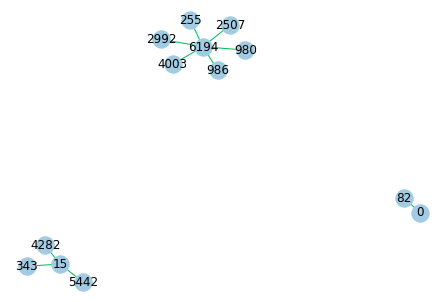

In [13]:
#creating a sample of 10 data points for visualization
pd.read_csv("/content/drive/My Drive/twitch/ENGB/musae_ENGB_edges.csv",nrows=10).to_csv('/content/train_woheader_sample.csv',header=False,index=False)
#reading the edgelist in a variable using networkX
subgraph=nx.read_edgelist('/content/train_woheader_sample.csv',delimiter=',',nodetype=int)
#plotting the graph
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [30]:
%%time
###generating missing edges from given graph
### This is important as we have to create a balanced training data (not skewed)
import random
#getting all set of edges
r = csv.reader(open('/content/train_woheader.csv','r'))
#the dict will contain a tuple of 2 nodes as key and the value will be 1 if the nodes are connected else -1
edges = dict()
for edge in r:
	edges[(edge[0], edge[1])] = 1    ###Setting labels to be 1 as the value in the dictionary for the existent edges
    
missing_edges = set([])
while (len(missing_edges)<35324):
	a=random.randint(0, 7125)        ###  Selecting 2 nodes at random
	b=random.randint(0, 7125)
	tmp = edges.get((a,b),0)             ###  tmp=1 if the edge exists between a and b else tmp=0
	if tmp == 0 and a!=b:
		try:
            # adding points who are less likely to be linked,i.e, don't have a common node
			if nx.shortest_path_length(g,source=a,target=b) > 2: 

				missing_edges.add((a,b))
			else:
				continue  
		except:  
				missing_edges.add((a,b))              
	else:
		continue

CPU times: user 2.65 s, sys: 409 µs, total: 2.65 s
Wall time: 2.66 s


In [31]:
print(len(missing_edges)) ### Can be seen to be the same number as existent edges

35324


In [32]:
print(missing_edges)  ###pairs of nodes without edges to be used in the training data

{(2327, 4862), (6150, 5949), (5746, 943), (4320, 5016), (2744, 6725), (1268, 2292), (2525, 5793), (4972, 4395), (2265, 2287), (6803, 1130), (2599, 6454), (1772, 6158), (320, 3023), (2819, 2947), (4235, 963), (1017, 6637), (3775, 3961), (4810, 5696), (3395, 6705), (1500, 1561), (3766, 5696), (1203, 6345), (2708, 4697), (2943, 5101), (3807, 5976), (3881, 5342), (3912, 2972), (174, 6516), (2622, 4985), (4266, 2825), (995, 3353), (5610, 958), (2842, 257), (2423, 2890), (6239, 4024), (3981, 6749), (2299, 4036), (2203, 3234), (4413, 5244), (572, 4836), (1727, 5990), (5756, 926), (5938, 1519), (558, 4403), (2282, 5933), (3183, 5845), (2324, 2430), (3251, 645), (3816, 1713), (4080, 4654), (6304, 6537), (6351, 5680), (4152, 4426), (4349, 775), (4873, 2575), (526, 3812), (6503, 1150), (4542, 3530), (3357, 5039), (2341, 6975), (3708, 1809), (7101, 4957), (2309, 101), (1945, 5343), (3763, 4048), (6670, 5598), (3534, 3321), (4263, 2125), (4614, 5062), (480, 4976), (4852, 1820), (3003, 5600), (5287,

In [33]:
print(edges)  ###Our dictionary of edges

{('6194', '255'): 1, ('6194', '980'): 1, ('6194', '2992'): 1, ('6194', '2507'): 1, ('6194', '986'): 1, ('6194', '4003'): 1, ('0', '82'): 1, ('15', '343'): 1, ('15', '4282'): 1, ('15', '5442'): 1, ('15', '1162'): 1, ('15', '3401'): 1, ('7106', '6211'): 1, ('7106', '6611'): 1, ('7106', '1348'): 1, ('7106', '2239'): 1, ('2', '5842'): 1, ('3', '3363'): 1, ('3', '1277'): 1, ('3', '3739'): 1, ('3', '6882'): 1, ('3', '4947'): 1, ('3', '5740'): 1, ('3', '5550'): 1, ('4', '4087'): 1, ('5', '2481'): 1, ('5', '5269'): 1, ('5', '1'): 1, ('5', '3401'): 1, ('6', '6072'): 1, ('6', '3996'): 1, ('6', '448'): 1, ('6', '1673'): 1, ('6', '3079'): 1, ('6', '436'): 1, ('6', '2126'): 1, ('6', '743'): 1, ('6', '4115'): 1, ('6', '6286'): 1, ('7', '2787'): 1, ('7', '1339'): 1, ('8', '6926'): 1, ('9', '3401'): 1, ('9', '3756'): 1, ('9', '1773'): 1, ('9', '5945'): 1, ('9', '5424'): 1, ('9', '474'): 1, ('9', '2872'): 1, ('9', '2439'): 1, ('9', '6121'): 1, ('9', '2352'): 1, ('9', '6168'): 1, ('9', '3258'): 1, ('10'